# Mapping RBG values to their true wavelengths

<h1>Understanding Rod cells</h1>
ref: Principles of Neuroscience Chapter 26

- rod cells are active in low light conditions
- they have high sensitivity to light
    - they can detect single photons
- phototransduction:
    - Rod cells contain Rhodopsin.
    - absorption of photos by a pigment protein
    - lowers concentration of cGMP
    - with the absorption of photon, closes cGMP gated channels and movign the cell closer to K+ equillibrium
    - light hypterpolarizes the photoreceptor
 
- cone cell
- each type of cone cell in the human retina produces a variant of the opsin protein
- depend on an absorption spectrum
- "the relative degree of excitation in these cone types contains information about the spectrum of the light independant of it's intensity"


<h1>What is the optimal wavelength to activate Rhodopsin?</h1>

max wavelength is 493nm - 500nm. 

and I just learned about the visual spectrum, the whole thing is only 400 - 700nm long, thats crazy and not even that large of a range

<h1>Mapping RGB values to their true wavelengths</h1>

In [88]:
from PIL import Image
import numpy as np
import colorsys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb_to_wavelength(r, g, b):
    # Normalize RGB values to the range [0, 1]
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    
    # Convert RGB to HSV
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    
    # Convert hue to degrees
    h_deg = h * 360
    
    # Map hue to wavelength
    if 0 <= h_deg < 60:
        wavelength = 620 - (h_deg / 60) * (620 - 590)
    elif 60 <= h_deg < 120:
        wavelength = 590 - ((h_deg - 60) / 60) * (590 - 495)
    elif 120 <= h_deg < 180:
        wavelength = 495 - ((h_deg - 120) / 60) * (495 - 480)
    elif 180 <= h_deg < 240:
        wavelength = 480 - ((h_deg - 180) / 60) * (480 - 450)
    elif 240 <= h_deg < 300:
        wavelength = 450 - ((h_deg - 240) / 60) * (450 - 400)
    else:
        wavelength = 400 + ((h_deg - 300) / 60) * (620 - 400)
    
    return wavelength

def image_to_wavelengths(image_path):
    # Open the image
    image = Image.open(image_path)
    image = image.convert("RGB")
    
    # Get image dimensions
    width, height = image.size
    
    # Create an array to hold the wavelength values
    wavelength_array = np.zeros((height, width))
    
    # Process each pixel
    for y in range(height):
        for x in range(width):
            r, g, b = image.getpixel((x, y))
            wavelength = rgb_to_wavelength(r, g, b)
            wavelength_array[y, x] = wavelength
    
    return wavelength_array

# Example usage:
image_path = "text_image_1.jpg"
image_wavelengths = image_to_wavelengths(image_path)

# Save or display the wavelengths array as needed
np.save("wavelengths.npy", image_wavelengths)  # Save as a .npy file


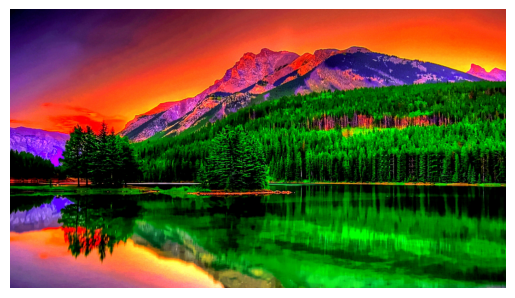

In [89]:
img = mpimg.imread('text_image_1.jpg')  # Replace with your image path

# Display image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

[[446.42857143 450.         450.         ... 617.23404255 617.23404255
  617.23404255]
 [446.42857143 446.42857143 450.         ... 617.23404255 617.23404255
  617.23404255]
 [446.15384615 442.85714286 446.42857143 ... 617.27272727 617.27272727
  617.27272727]
 ...
 [429.72972973 429.72972973 431.08108108 ... 478.57142857 480.
  480.57692308]
 [429.72972973 429.72972973 429.72972973 ... 465.         468.88888889
  468.        ]
 [429.72972973 429.72972973 429.72972973 ... 458.88888889 460.64516129
  460.58823529]]


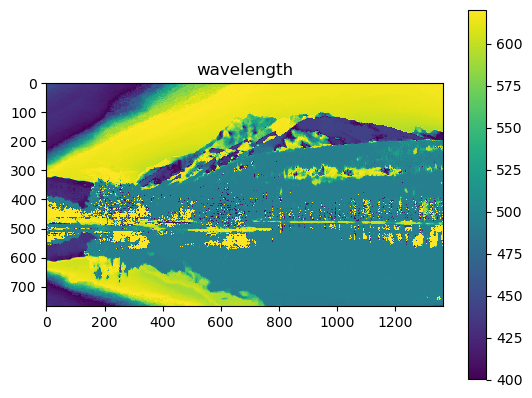

In [90]:
print(image_wavelengths)

plt.imshow(image_wavelengths, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('wavelength')
plt.show()

Map hue to wavelength:

0 <= h_deg < 60: Corresponds to red to yellow.

60 <= h_deg < 120: Corresponds to yellow to green.

120 <= h_deg < 180: Corresponds to green to cyan.

180 <= h_deg < 240: Corresponds to cyan to blue.

240 <= h_deg < 300: Corresponds to blue to violet.

300 <= h_deg <= 360: Corresponds to violet to red (wrapping around).


<h1>Create a graph that maps the wavelength to excitation based on this paper i found from 1968</h1>

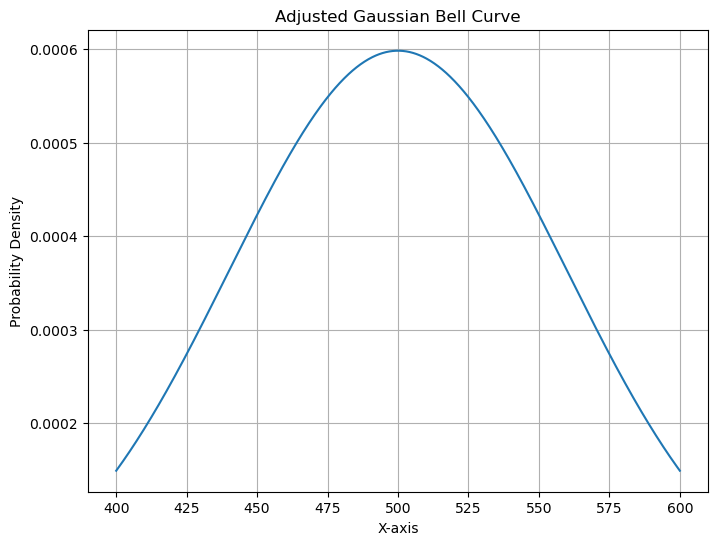

In [91]:


def gaussian(x, mu, sigma, max_height):
    return max_height * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))


max_height = 0.09

# Generate data points
x = np.linspace(400, 600, 1000)  # 1000 points from -5 to 5
mu = 500 # mean
sigma = 60 # standard deviation

# Calculate Gaussian function with adjusted height
y = gaussian(x, mu, sigma, max_height)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, y,)

plt.title('Adjusted Gaussian Bell Curve')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()



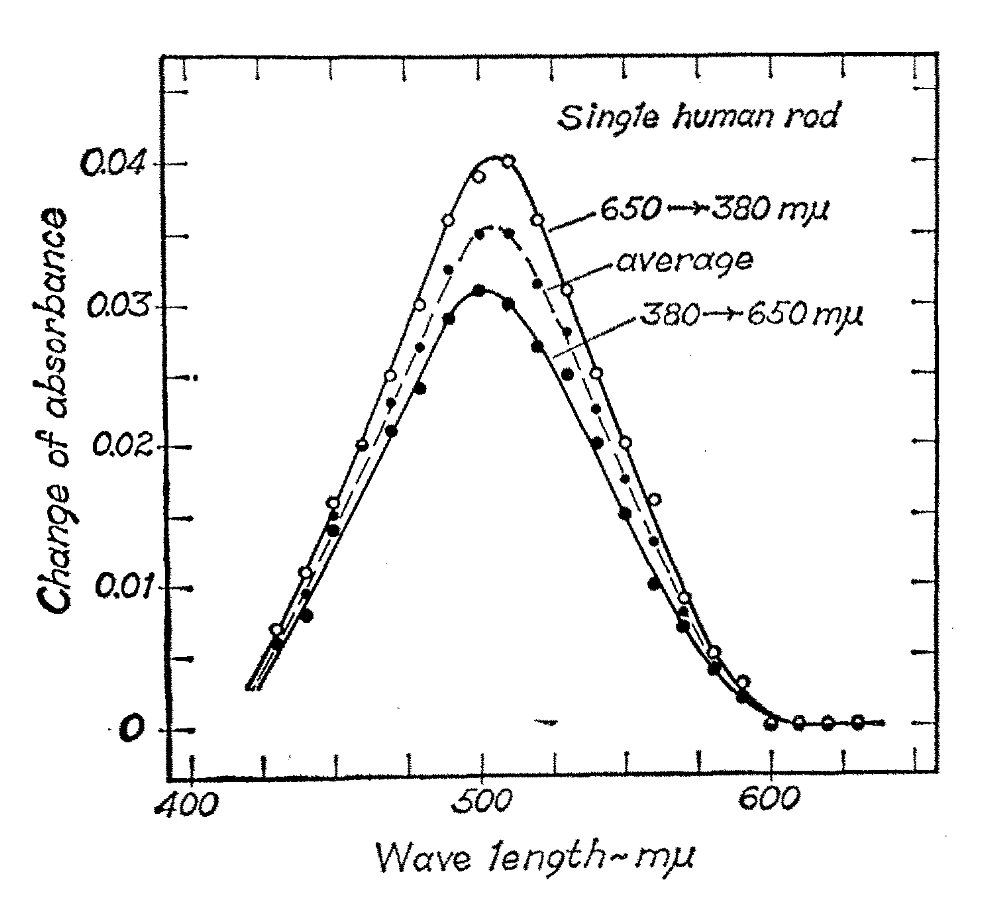

In [92]:

def gaussian_rhodopsin(x):
    return  0.09 * np.exp(-((x - 500) ** 2) / (2 * 60 ** 2)) / (60 * np.sqrt(2 * np.pi))

<h1>Create Rod Cell</h1>

In [93]:

def wavelength_to_filter_matrix(wavelength_matrix):
    # Initialize a matrix for filter values
    filter_matrix = np.zeros_like(wavelength_matrix, dtype=float)
    
    # Apply Gaussian-like function to each element in the wavelength matrix
    for i in range(wavelength_matrix.shape[0]):
        for j in range(wavelength_matrix.shape[1]):
            wavelength = wavelength_matrix[i, j]
            filter_value = gaussian_rhodopsin(wavelength)
            filter_matrix[i, j] = filter_value
    
    # Ensure filter values are between 0 and 1
    filter_matrix = np.clip(filter_matrix, 0, 1)
    
    return filter_matrix




In [94]:
output= wavelength_to_filter_matrix(image_wavelengths)

In [95]:
print(output)

[[4.01691715e-04 4.22867813e-04 4.22867813e-04 ... 8.87140134e-05
  8.87140134e-05 8.87140134e-05]
 [4.01691715e-04 4.01691715e-04 4.22867813e-04 ... 8.87140134e-05
  8.87140134e-05 8.87140134e-05]
 [4.00048688e-04 3.80226495e-04 4.01691715e-04 ... 8.86023062e-05
  8.86023062e-05 8.86023062e-05]
 ...
 [3.01406815e-04 3.01406815e-04 3.09384548e-04 ... 5.61440804e-04
  5.66074842e-04 5.67865843e-04]
 [3.01406815e-04 3.01406815e-04 3.01406815e-04 ... 5.04790234e-04
  5.23141053e-04 5.19080840e-04]
 [3.01406815e-04 3.01406815e-04 3.01406815e-04 ... 4.73211524e-04
  4.82591375e-04 4.82290930e-04]]


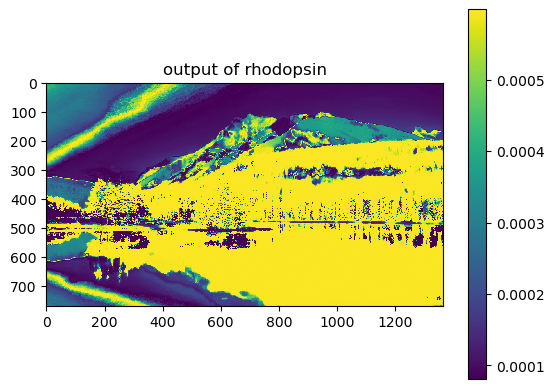

In [96]:

# arr_2d = np.random.rand(10, 10) * 0.001

plt.imshow(output, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('output of rhodopsin')
plt.show()